In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\91965\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


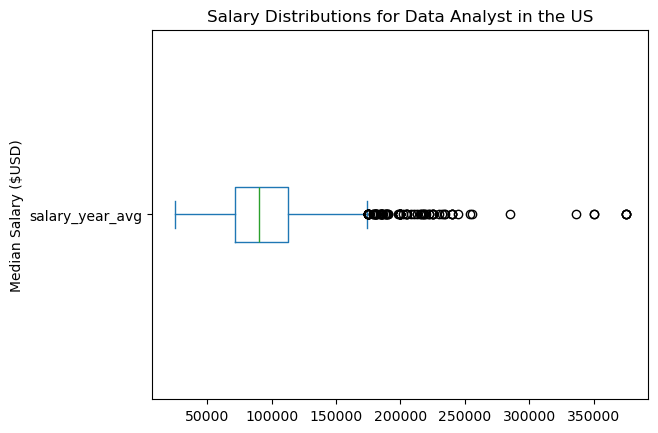

In [8]:
df_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset = ['salary_year_avg'])
df_US['salary_year_avg'].plot(kind='box', vert=False)
plt.title('Salary Distributions for Data Analyst in the US')
plt.ylabel('Median Salary ($USD)')
plt.show()

In [15]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].dropna(subset= ['salary_year_avg'])



C:\Users\91965\AppData\Local\Temp\ipykernel_9372\149157147.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels= job_titles, vert=False)


{'whiskers': [<matplotlib.lines.Line2D at 0x26921ef8e50>,
 'caps': [<matplotlib.lines.Line2D at 0x26921efae90>,
 'boxes': [<matplotlib.lines.Line2D at 0x26921ef8f50>,
 'medians': [<matplotlib.lines.Line2D at 0x26922098090>,
 'fliers': [<matplotlib.lines.Line2D at 0x26922098890>,
 'means': []}

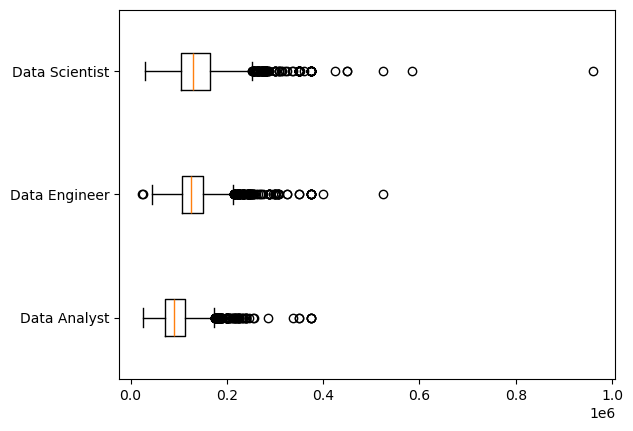

In [20]:
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels= job_titles, vert=False)

In [13]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter for the job titles and country
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

C:\Users\91965\AppData\Local\Temp\ipykernel_9372\1563764435.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


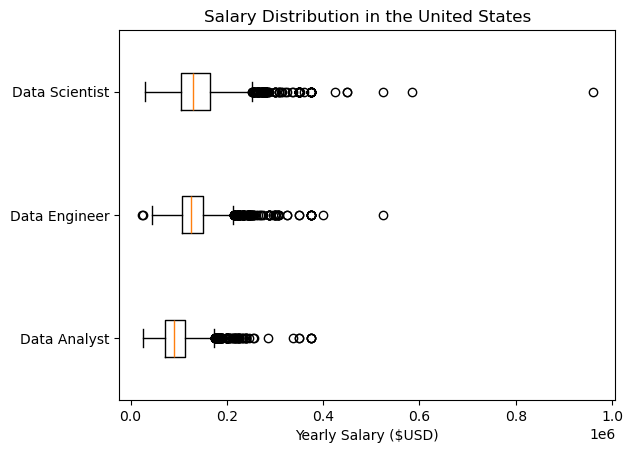

In [ ]:

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.show()

C:\Users\91965\AppData\Local\Temp\ipykernel_9372\2141833509.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


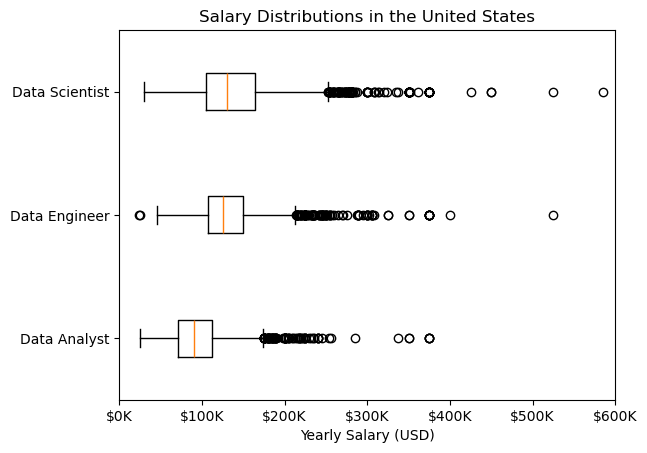

In [21]:
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 600000) 

# Format x-axis to show 'Thousands'
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()